In [6]:
# Data Fetch
import pandas as pd
import numpy as np
# Data Processing 
import cv2
import io
from glob import glob
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Activation,Dropout, Input, concatenate
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model



In [5]:
!git clone https://github.com/emanhamed/Houses-dataset


Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 38.63 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Checking out files: 100% (2144/2144), done.


In [7]:
root_path = "/content/Houses-dataset/Houses Dataset/"

In [8]:
bathrooms = [root_path+str(i)+"_bathroom.jpg" for i in range(1,536)]
bedrooms = [root_path+str(i)+"_bedroom.jpg" for i in range(1,536)]
kitchens = [root_path+str(i)+"_kitchen.jpg" for i in range(1,536)]
frontals = [root_path+str(i)+"_frontal.jpg" for i in range(1,536)]

In [9]:
txt_file = "HousesInfo.txt"

In [10]:
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
df = pd.read_csv(root_path+txt_file, sep=" ", header=None, names=cols)

In [11]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [12]:
# Quick Data Check
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
zipcode      0
price        0
dtype: int64

In [13]:
numerical_columns = df.columns[:3]
categorical_columns = ['zipcode']

In [14]:
# 1 Numerical DNN
# 2 Categorical Data DNN - for Zipcode
# 4 CNN's for 4 views of the house

In [15]:
# Numerical DNN

In [16]:
num_dnn = Sequential()
num_dnn.add(Dense(input_dim = df[numerical_columns].shape[1], units = 8  ))
num_dnn.add(Dense(units = 8 ))
num_dnn.add(Dense( units = 2 ))


In [17]:
# Processing Categorical Data
binarize_object = LabelBinarizer()
categorical_data = binarize_object.fit_transform(df[categorical_columns])

In [18]:
# Categorical DNN
cat_dnn = Sequential()
cat_dnn.add(Dense(input_dim = categorical_data.shape[1], units = 8  ))
cat_dnn.add(Dense(units = 8 ))
cat_dnn.add(Dense( units = 2 ))

In [19]:
# 4 CNN's for each section of the house


In [20]:
bathrooms_data = []
for bathroom in bathrooms:
  image = cv2.imread(bathroom)
  image = cv2.resize(image, (32, 32))
  bathrooms_data.append(image)

In [21]:
bedrooms_data = []
for bedroom in bedrooms:
  image = cv2.imread(bedroom)
  image = cv2.resize(image, (32, 32))
  bedrooms_data.append(image)

In [22]:
kitchens_data = []
for kitchen in kitchens:
  image = cv2.imread(kitchen)
  image = cv2.resize(image, (32, 32))
  kitchens_data.append(image)

In [23]:
frontals_data = []
for frontal in frontals:
  image = cv2.imread(frontal)
  image = cv2.resize(image, (32, 32))
  frontals_data.append(image)

In [24]:
bathrooms_data = np.array(bathrooms_data)
bedrooms_data = np.array(bedrooms_data)
kitchens_data = np.array(kitchens_data)
frontals_data = np.array(frontals_data)

In [26]:
y = df['price']

In [27]:
bath_train_images , bath_test_images, y_train, y_test = train_test_split(bathrooms_data,y, train_size = 0.8, random_state = 42 )
bed_train_images , bed_test_images, y_train, y_test = train_test_split(bedrooms_data,y, train_size = 0.8, random_state = 42 )
kit_train_images , kit_test_images, y_train, y_test = train_test_split(kitchens_data,y, train_size = 0.8, random_state = 42 )
front_train_images , front_test_images, y_train, y_test = train_test_split(frontals_data,y, train_size = 0.8, random_state = 42 )
X_num_train, X_num_test , y_train, y_test = train_test_split(df[numerical_columns],y, train_size = 0.8, random_state = 42 )
X_cat_train, X_cat_test , y_train, y_test = train_test_split(categorical_data,y, train_size = 0.8, random_state = 42 )

In [28]:
bath_train_images, bath_test_images = bath_train_images / 255.0, bath_test_images / 255.0
bed_train_images, bed_test_images = bed_train_images / 255.0, bed_test_images / 255.0
kit_train_images, kit_test_images = kit_train_images / 255.0, kit_test_images / 255.0
front_train_images, front_test_images = front_train_images / 255.0, front_test_images / 255.0

In [29]:
# CNN Function
def create_cnn():
  model = Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(4, activation='relu'))

  return model

In [30]:
bathroom_model = create_cnn()
bedroom_model = create_cnn()
kitchen_model = create_cnn()
frontal_model = create_cnn()

In [31]:
# Combining all the models Together - STACK !
combinedInput = concatenate([num_dnn.output, cat_dnn.output,
                             bathroom_model.output,bedroom_model.output,
                             kitchen_model.output, frontal_model.output])

In [32]:
x = Dense(6, activation="linear")(combinedInput) # Add a dense layer post stacking
final_layer = Dense(1, activation="linear")(x)
model = Model(inputs=[num_dnn.input, cat_dnn.input,
                      bathroom_model.input,bedroom_model.input,
                      kitchen_model.input, frontal_model.input],
              outputs=final_layer)

In [33]:
opt = Adam(learning_rate=1e-2, decay=1e-3 / 200)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

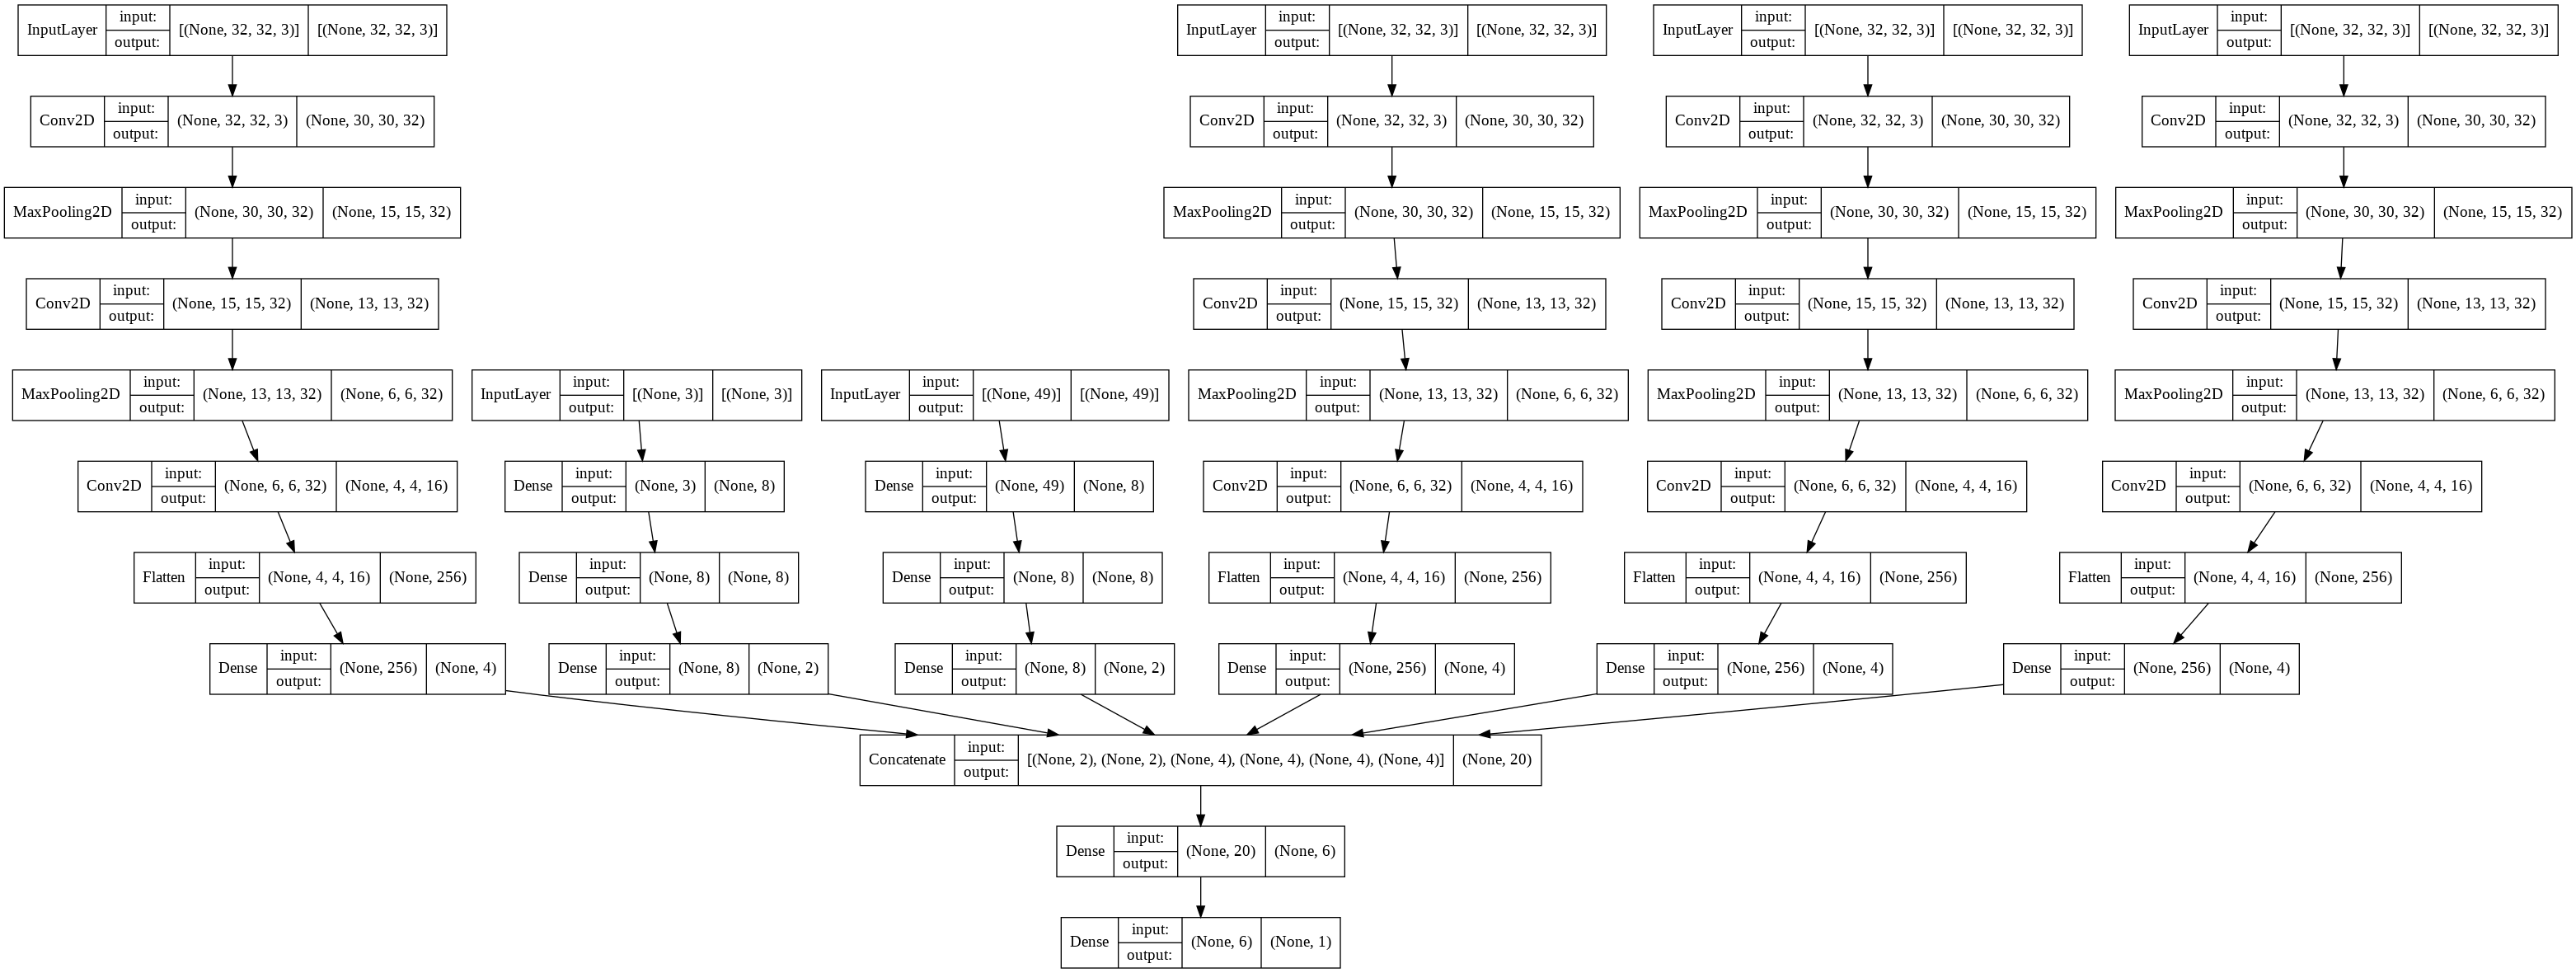

In [34]:
plot_model(model, show_layer_names = False, show_shapes = True)

In [35]:
model.fit(
    x=[X_num_train, X_cat_train,
       bath_train_images,bed_train_images,
       kit_train_images, front_train_images ],
    y=y_train, validation_split = 0.2,
    epochs=10, batch_size=8)

Epoch 1/10
43/43 [==============================] - 8s 95ms/step - loss: 463106.8438 - mean_absolute_error: 463106.8438 - val_loss: 238532.5781 - val_mean_absolute_error: 238532.5781
Epoch 2/10
43/43 [==============================] - 2s 46ms/step - loss: 332303.9375 - mean_absolute_error: 332303.9375 - val_loss: 213293.2344 - val_mean_absolute_error: 213293.2344
Epoch 3/10
43/43 [==============================] - 2s 46ms/step - loss: 308644.7812 - mean_absolute_error: 308644.7812 - val_loss: 187206.4688 - val_mean_absolute_error: 187206.4844
Epoch 4/10
43/43 [==============================] - 2s 46ms/step - loss: 295055.9688 - mean_absolute_error: 295055.9688 - val_loss: 185619.1250 - val_mean_absolute_error: 185619.1250
Epoch 5/10
43/43 [==============================] - 2s 48ms/step - loss: 286972.6250 - mean_absolute_error: 286972.6250 - val_loss: 178389.3438 - val_mean_absolute_error: 178389.3438
Epoch 6/10
43/43 [==============================] - 2s 48ms/step - loss: 261806.4062 

In [36]:
model.predict([X_num_test, X_cat_test,
       bath_test_images,bed_test_images,
       kit_test_images, front_test_images])

array([[ 562051.56 ],
       [ 862962.   ],
       [ 149938.95 ],
       [ 591820.   ],
       [ 807130.6  ],
       [  36151.785],
       [ 793113.9  ],
       [ 758773.44 ],
       [ 700557.6  ],
       [ 673315.94 ],
       [ 633261.1  ],
       [ 376973.03 ],
       [ 416595.3  ],
       [ 520631.1  ],
       [ 647518.94 ],
       [ 562777.06 ],
       [ 372076.   ],
       [  29263.729],
       [ 779405.9  ],
       [ 429437.75 ],
       [1190200.1  ],
       [  54920.535],
       [1265872.1  ],
       [ 716457.7  ],
       [1002037.75 ],
       [  38881.645],
       [ 658422.44 ],
       [1149149.8  ],
       [ 104011.5  ],
       [ 583650.3  ],
       [ 175974.52 ],
       [ 349362.5  ],
       [ 394969.88 ],
       [  59057.234],
       [ 280014.34 ],
       [ 885652.06 ],
       [ 497693.72 ],
       [1238721.1  ],
       [ 784852.44 ],
       [ 663215.7  ],
       [ 834553.4  ],
       [ 577310.3  ],
       [ 634886.1  ],
       [ 363646.7  ],
       [ 440021.1  ],
       [ 1

In [ ]:
from alibi.explainers import IntegratedGradients

In [ ]:
# !pip install alibi

In [ ]:
n_steps = 50
method = "gausslegendre"
ig  = IntegratedGradients(num_dnn,
                          n_steps=n_steps,
                          method=method)

In [ ]:
predictions = num_dnn.numpy().argmax(axis=1)
explanation = ig.explain(X_test_sample,
                         baselines=None,
                         target=predictions)

In [ ]:
num_dnn.predict(X_num_test)

array([[  62938.492,  -42444.934],
       [  73811.57 ,  -49779.164],
       [  37227.49 ,  -25106.58 ],
       [ 110897.23 ,  -74788.63 ],
       [  89647.734,  -60461.15 ],
       [  32966.36 ,  -22229.785],
       [  83621.1  ,  -56391.484],
       [ 101807.484,  -68659.79 ],
       [  41226.56 ,  -27802.57 ],
       [  93059.07 ,  -62760.703],
       [  63705.03 ,  -42960.484],
       [  67915.664,  -45802.734],
       [  46205.188,  -31159.307],
       [  98461.445,  -66404.29 ],
       [ 120614.24 ,  -81346.555],
       [  70202.76 ,  -47343.402],
       [  66057.53 ,  -44550.33 ],
       [  31660.285,  -21348.797],
       [  55200.   ,  -37225.08 ],
       [  51625.4  ,  -34815.406],
       [ 158421.98 , -106843.03 ],
       [  36884.586,  -24872.752],
       [ 139208.7  ,  -93887.586],
       [  92144.82 ,  -62144.008],
       [ 128648.055,  -86763.57 ],
       [  32869.973,  -22167.781],
       [  88141.88 ,  -59440.402],
       [ 114717.49 ,  -77365.516],
       [  44198.61 ,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y , train_size = 0.7, random_state = 42)

In [ ]:
# Let's build 2 neural networks

In [ ]:
# Network 1
network_1 = Sequential()
network_1.add(Dense(units = 4, input_dim=X_train.shape[1] , activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
#network_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Network 2
network_2 = Sequential()
network_2.add(Dense(units = 16, input_dim=X_train.shape[1] , activation='relu'))
network_2.add(Dense(units = 16, activation='relu'))
network_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

In [ ]:
combinedInput = concatenate([network_1.output, network_2.output])

In [ ]:
x = Dense(1, activation="linear")(combinedInput)
model = Model(inputs=[network_1.input, network_2.input], outputs=x)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_input (InputLayer)       [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            36          ['dense_input[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 4)            20          ['dense[0][0]']                  
                                                                                                  
 dense_4_input (InputLayer)     [(None, 8)]          0           []                               
                                                                                            

In [ ]:
from tensorflow.keras.utils import plot_model

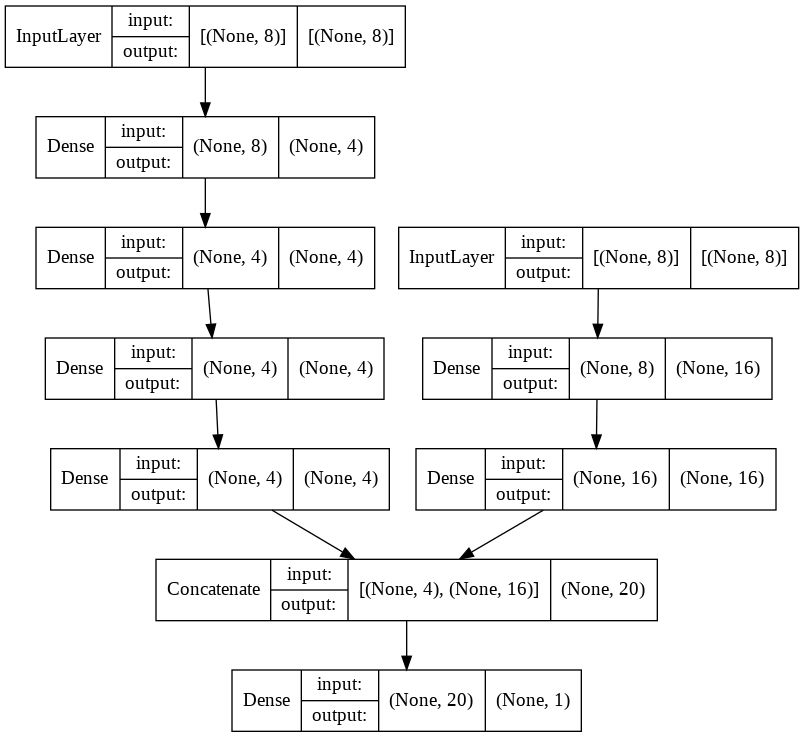

In [ ]:
plot_model(model, show_layer_names = False, show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=1e-2, decay=1e-3 / 200)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit( x=[X_train, X_train],
          y=y_train,
          validation_split = 0.2,
          epochs=10, batch_size=64 )

Epoch 1/10
181/181 [==============================] - 4s 9ms/step - loss: 0.5784 - mean_absolute_error: 0.5784 - val_loss: 0.5552 - val_mean_absolute_error: 0.5552
Epoch 2/10
181/181 [==============================] - 1s 6ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - val_loss: 0.5932 - val_mean_absolute_error: 0.5932
Epoch 3/10
181/181 [==============================] - 1s 3ms/step - loss: 0.5635 - mean_absolute_error: 0.5635 - val_loss: 0.6087 - val_mean_absolute_error: 0.6087
Epoch 4/10
181/181 [==============================] - 0s 3ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - val_loss: 0.5450 - val_mean_absolute_error: 0.5450
Epoch 5/10
181/181 [==============================] - 0s 3ms/step - loss: 0.5472 - mean_absolute_error: 0.5472 - val_loss: 0.5359 - val_mean_absolute_error: 0.5359
Epoch 6/10
181/181 [==============================] - 0s 3ms/step - loss: 0.5670 - mean_absolute_error: 0.5670 - val_loss: 0.5362 - val_mean_absolute_error: 0.5362
Epoch 7/10
181/1

In [ ]:
y_pred = model.predict([X_test, X_test])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
import numpy as np

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7574030418520549

In [ ]:
mean_absolute_percentage_error(y_pred, y_test)

0.291317732611093

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1.1380445756412008

In [ ]:
np.var(np.abs(y_test-y_pred))

0.793261983872898

In [ ]:
#model_2 = create_dnn(X_train.shape[1], hl_1_nodes = 16, hl_2_nodes = 16)
model_2 = Sequential()
model_2.add(Dense(units = 16, input_dim=X_train.shape[1] , activation='relu'))
model_2.add(Dense(units = 16, activation='relu'))
model_2.add(Dense(units = 1))
model_2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                112       
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.fit(X_train, y_train, epochs=15, batch_size=128, validation_split = 0.2)

Epoch 1/15
91/91 [==============================] - 1s 4ms/step - loss: 17.0752 - mean_absolute_error: 17.0752 - val_loss: 1.3021 - val_mean_absolute_error: 1.3021
Epoch 2/15
91/91 [==============================] - 0s 3ms/step - loss: 1.0857 - mean_absolute_error: 1.0857 - val_loss: 1.2018 - val_mean_absolute_error: 1.2018
Epoch 3/15
91/91 [==============================] - 0s 2ms/step - loss: 0.9602 - mean_absolute_error: 0.9602 - val_loss: 1.0452 - val_mean_absolute_error: 1.0452
Epoch 4/15
91/91 [==============================] - 0s 2ms/step - loss: 0.9926 - mean_absolute_error: 0.9926 - val_loss: 1.1100 - val_mean_absolute_error: 1.1100
Epoch 5/15
91/91 [==============================] - 0s 2ms/step - loss: 1.0403 - mean_absolute_error: 1.0403 - val_loss: 0.6856 - val_mean_absolute_error: 0.6856
Epoch 6/15
91/91 [==============================] - 0s 3ms/step - loss: 1.0140 - mean_absolute_error: 1.0140 - val_loss: 1.2741 - val_mean_absolute_error: 1.2741
Epoch 7/15
91/91 [========

In [ ]:
y_pred = model_2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9723354667201886

In [ ]:
np.var(np.abs(y_test-y_pred))

1.0105251702556646

In [ ]:
# Let's Stack them Together

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

In [ ]:
combinedInput = concatenate([model_1.output, model_2.output])

In [ ]:
x = Dense(1, activation="linear")(combinedInput)
model = Model(inputs=[model_1.input, model_2.input], outputs=x)

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
model.fit(
    x=[X_train, X_train], y=y_train, validation_split = 0.2,
    epochs=30, batch_size=256)

Epoch 1/30
46/46 [==============================] - 1s 8ms/step - loss: 1.2051 - mean_absolute_error: 1.2051 - val_loss: 0.6384 - val_mean_absolute_error: 0.6384
Epoch 2/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5874 - mean_absolute_error: 0.5874 - val_loss: 0.5790 - val_mean_absolute_error: 0.5790
Epoch 3/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6151 - mean_absolute_error: 0.6151 - val_loss: 0.5813 - val_mean_absolute_error: 0.5813
Epoch 4/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6137 - mean_absolute_error: 0.6137 - val_loss: 0.6038 - val_mean_absolute_error: 0.6038
Epoch 5/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6154 - mean_absolute_error: 0.6154 - val_loss: 0.8572 - val_mean_absolute_error: 0.8572
Epoch 6/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6934 - mean_absolute_error: 0.6934 - val_loss: 0.6045 - val_mean_absolute_error: 0.6045
Epoch 7/30
46/46 [==========

In [ ]:
y_pred = model.predict([X_test, X_test])

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8625250461467957

In [ ]:
np.var(np.abs(y_test-y_pred))

0.9418494075550469